In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Linear regression

0. Zorg voor goede data (uitleg volgt in week 2)
1. kies een modeltype (we kiezen nu een random forest -> uitleg volgt in week 3)
2. kies de juiste hyperparameters (we nemen nu de default -> uitleg volgt in week 5)
3. definieer een dataframe met de features en een met de target variabele
4. Split data in train/validatie(/test) (uitgebreide uitleg volgt in week 5)
5. train het model
6. Voorspel op nieuwe data
7. Kijk hoe goed het model presteert
8. herhaal!

In [ ]:
#Stap 0: Zorg voor goede data

In [2]:
x = np.arange(0,10,0.2)
delta = np.random.uniform(-1,2, size=(50,))
y = 0.7 * x + 1 + delta

linreg_df = pd.DataFrame({'x':x,'y':y})

<AxesSubplot:>

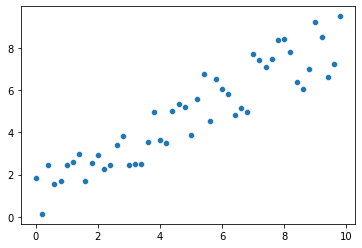

In [3]:
sns.scatterplot(data = linreg_df, x = x,y = y)

In [4]:
#Stap 1 + 2: Kies een modeltype en de juiste parameters 

In [4]:
linreg = LinearRegression()

In [ ]:
#Stap 3: Defineer afhankele en onafhankele variabelen

In [5]:
X = linreg_df['x']
y = linreg_df['y']

In [ ]:
#Stap 4: Split data in train/validatie(/test)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

<AxesSubplot:xlabel='x', ylabel='y'>

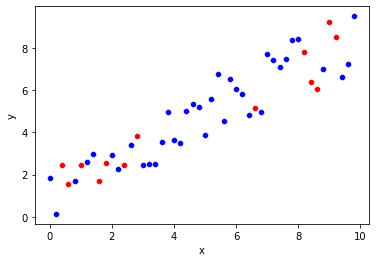

In [7]:
sns.scatterplot(x = X_train, y = y_train, color = 'blue')
sns.scatterplot(x = X_test, y = y_test, color = 'red')

In [ ]:
#Step 5: train het model

In [8]:
linreg.fit(np.array(X_train).reshape(-1,1), y_train)

LinearRegression()

In [9]:
y_pred = linreg.predict(np.array(X_test).reshape(-1,1))

In [11]:
X_test

3     0.6
5     1.0
43    8.6
33    6.6
14    2.8
9     1.8
12    2.4
42    8.4
8     1.6
46    9.2
45    9.0
41    8.2
2     0.4
Name: x, dtype: float64

In [10]:
y_pred

array([1.55427426, 1.86161694, 7.70112771, 6.16441435, 3.24465896,
       2.47630228, 2.93731629, 7.54745637, 2.32263095, 8.16214171,
       8.00847038, 7.39378503, 1.40060293])

<AxesSubplot:xlabel='x', ylabel='y'>

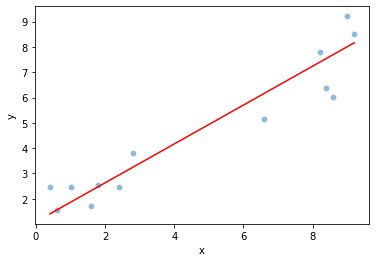

In [12]:
sns.scatterplot(x = X_test,y = y_test,alpha=0.5)
sns.lineplot(x = X_test, y = y_pred, color = 'r')

In [13]:
linreg.coef_

array([0.76835668])

In [14]:
linreg.intercept_

1.0932602568016727

In [ ]:
y = 0.76 *x + 1.09

In [15]:
mean_squared_error(y_test, y_pred)

0.7252334659683619

In [ ]:
#non-linear relationship

In [16]:
delta = np.random.uniform(-3,5, size=(50,))
y= (x - 1) * (x-5)*(x-9)  + delta

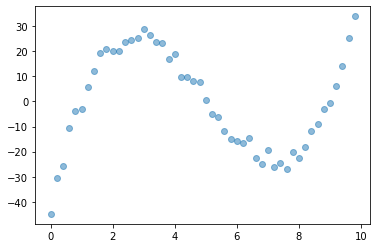

In [17]:
plt.scatter(x,y, alpha = 0.5)

In [ ]:
y = a_1 *x + a_2 *x^2 + a_3 * x^3

In [19]:
poly_df = pd.DataFrame({'x':x, 'x2':x*x, 'x3':x*x*x})

In [20]:
poly_df.head()

,x,x2,x3
0,0.0,0.00,0.000
1,0.2,0.04,0.008
2,0.4,0.16,0.064
3,0.6,0.36,0.216
4,0.8,0.64,0.512


In [21]:
polyreg = LinearRegression()

In [22]:
polyreg.fit(poly_df, y)

LinearRegression()

In [23]:
y_pred = polyreg.predict(poly_df)

In [24]:
y_pred

array([-44.18759692, -32.90185843, -22.77843216, -13.76886772,
        -5.82471476,   1.10247709,   7.0611582 ,  12.09977894,
        16.26678967,  19.61064076,  22.17978258,  24.02266549,
        25.18773986,  25.72345606,  25.67826445,  25.10061541,
        24.03895929,  22.54174646,  20.65742729,  18.43445216,
        15.92127141,  13.16633543,  10.21809458,   7.12499922,
         3.93549972,   0.69804645,  -2.53891022,  -5.72691993,
        -8.81753231, -11.762297  , -14.51276362, -17.02048182,
       -19.23700122, -21.11387145, -22.60264216, -23.65486297,
       -24.22208352, -24.25585343, -23.70772235, -22.52923991,
       -20.67195574, -18.08741946, -14.72718073, -10.54278916,
        -5.4857944 ,   0.49225393,   7.43980619,  15.40531275,
        24.43722397,  34.58399023])

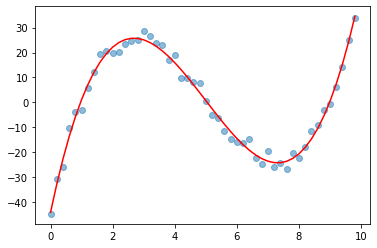

In [25]:
plt.scatter(x,y, alpha = 0.5)
plt.plot(x,y_pred, color = 'r')

In [21]:
np.sqrt(mean_squared_error(y, y_pred))

2.3131425413831397

## Linear regression

We gaan een lineair regressie model trainen op een echte dataset

In [26]:
houseprice = pd.read_csv('../data/housing_prices.csv')

In [27]:
houseprice.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [28]:
#Eerst printen we de kolommen, dan kunnen we goed zien wat we willen gebruiken
houseprice.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [25]:
houseprice['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

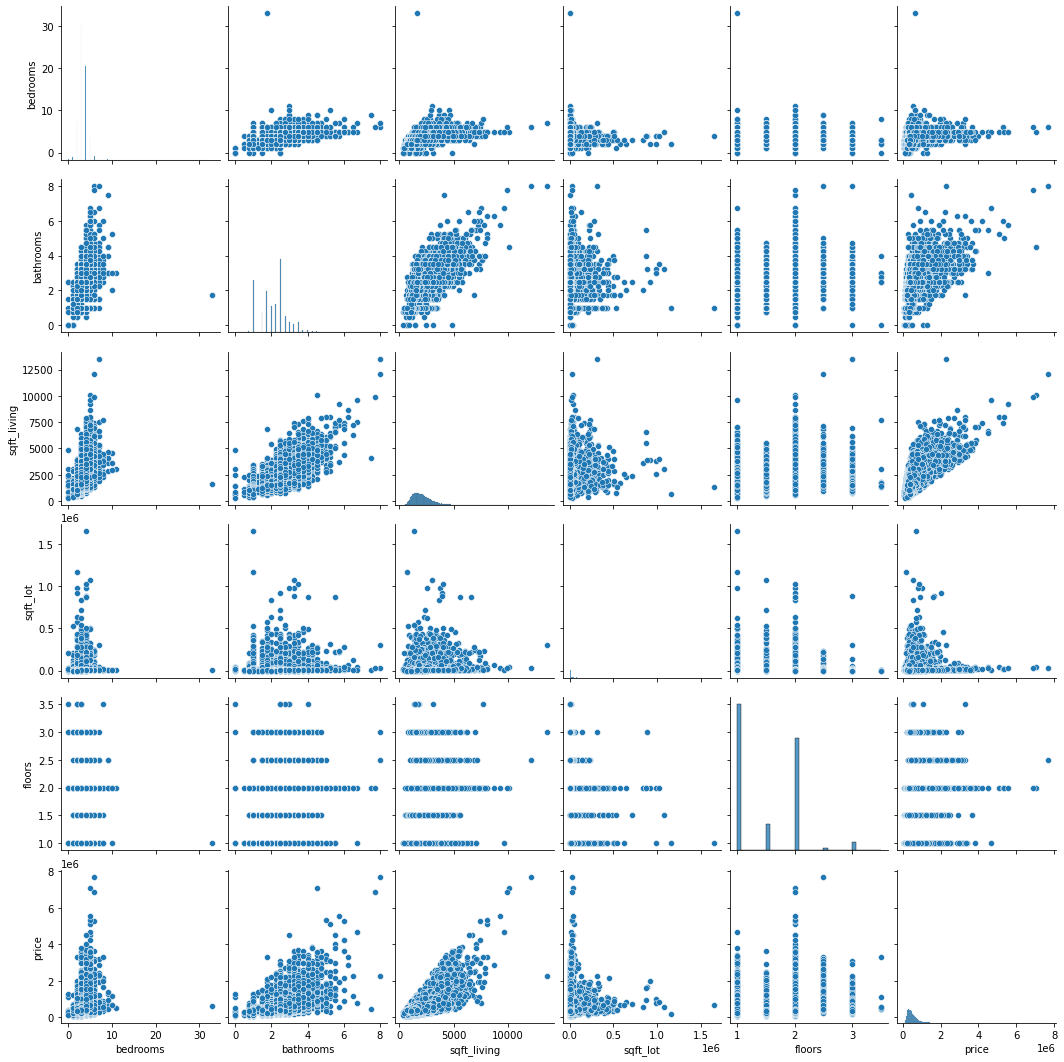

In [26]:
sns.pairplot(houseprice[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','price']])

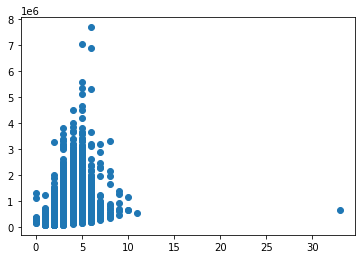

In [29]:
plt.scatter(houseprice['bedrooms'], houseprice['price'])

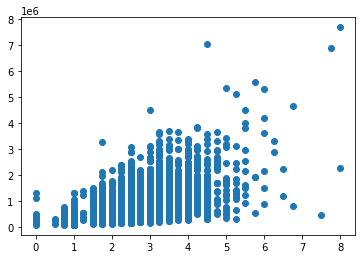

In [62]:
plt.scatter(houseprice['bathrooms'], houseprice['price'])

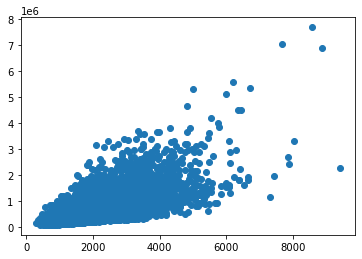

In [63]:
plt.scatter(houseprice['sqft_above'], houseprice['price'])

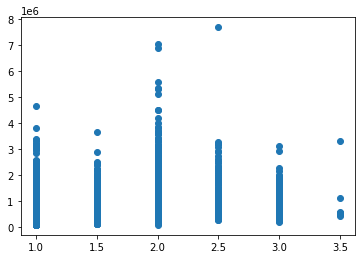

In [64]:
plt.scatter(houseprice['floors'], houseprice['price'])

We definieren het dataframe X met alle onafhankele variabelen (of features) en y met de afhankelijke variabele (of de target).

In [28]:
#Eerst printen we de kolommen, dan kunnen we goed zien wat we willen gebruiken
houseprice.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [30]:
X = houseprice[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors']]
y = houseprice['price']

We gebruiken train_test_split van sklearn om dit te splitten in een train en test set, zie: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

In [35]:
reg = LinearRegression()

In [36]:
reg.fit(X_train,y_train)

LinearRegression()

In [37]:
y_pred = reg.predict(X_test)

In [38]:
y_pred

array([ 503344.98717557,  712433.71245002, 1024748.03682242, ...,
        361469.65748638,  385205.71630153,  308480.69424251])

In [39]:
np.sqrt(mean_squared_error(y_test, y_pred))

272466.46119745966

In [35]:
reg.coef_

array([-5.61283154e+04,  1.14296225e+04,  3.05481186e+02, -3.86185804e-01,
       -2.26011981e+03])

In [ ]:
#Linear regression with statsmodels

In [40]:
import statsmodels.api as sm

X = sm.add_constant(X) #add an intercept 
model2 = sm.OLS(y, X)
results2 = model2.fit()
print(results2.summary())  

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     4474.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        10:09:08   Log-Likelihood:            -2.9992e+05
No. Observations:               21613   AIC:                         5.999e+05
Df Residuals:                   21607   BIC:                         5.999e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.066e+04   7696.073     10.481      

In [43]:
#Entropy
x = 1/3
-(x*np.log(x)/np.log(2) + x*np.log(x)/np.log(2)+x*np.log(x))

1.4228457633701406

# Decision Trees


## Data preparation

In [44]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [45]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until al

Load the dataset.

In [46]:
df = pd.read_csv("../data/adult_reconstruction.csv")
df.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,income,occupation
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,49100,Tech-support
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,11500,Craft-repair
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,2600,Other-service
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,38997,Sales
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,41400,Exec-managerial


In [47]:
df["income_above_50K"] = df["income"] > 50_000

# the resulting cell values are booleans, we convert them to integers (0 or 1)
df["income_above_50K"] = df["income_above_50K"].astype(int)

del df["income"]
df.head()

,hours-per-week,age,capital-gain,capital-loss,workclass,education,education-num,marital-status,relationship,race,gender,native-country,occupation,income_above_50K
0,20,40,0,0,Private,Bachelors,13,Married-civ-spouse,Wife,White,Female,United-States,Tech-support,0
1,40,21,0,0,Private,Some-college,10,Divorced,Own-child,White,Male,United-States,Craft-repair,0
2,10,17,0,0,Private,11th,7,Never-married,Own-child,White,Male,United-States,Other-service,0
3,50,51,0,0,Private,HS-grad,9,Married-civ-spouse,Husband,Asian-Pac-Islander,Male,Cambodia,Sales,0
4,38,28,0,0,Private,Bachelors,13,Never-married,Not-in-family,White,Male,?,Exec-managerial,0


In [48]:
df = df.replace('?',np.nan)

In [49]:
df = df.dropna()

In [50]:
df = pd.get_dummies(df)

In [51]:
df.head()

,hours-per-week,age,capital-gain,capital-loss,education-num,income_above_50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,20,40,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,40,21,0,0,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,10,17,0,0,7,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,50,51,0,0,9,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,38,26,0,1876,13,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X = df.drop(columns=["income_above_50K"])  # numpy array without the outcome variable
y = df["income_above_50K"]  # numpy array with the outcome variable only

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

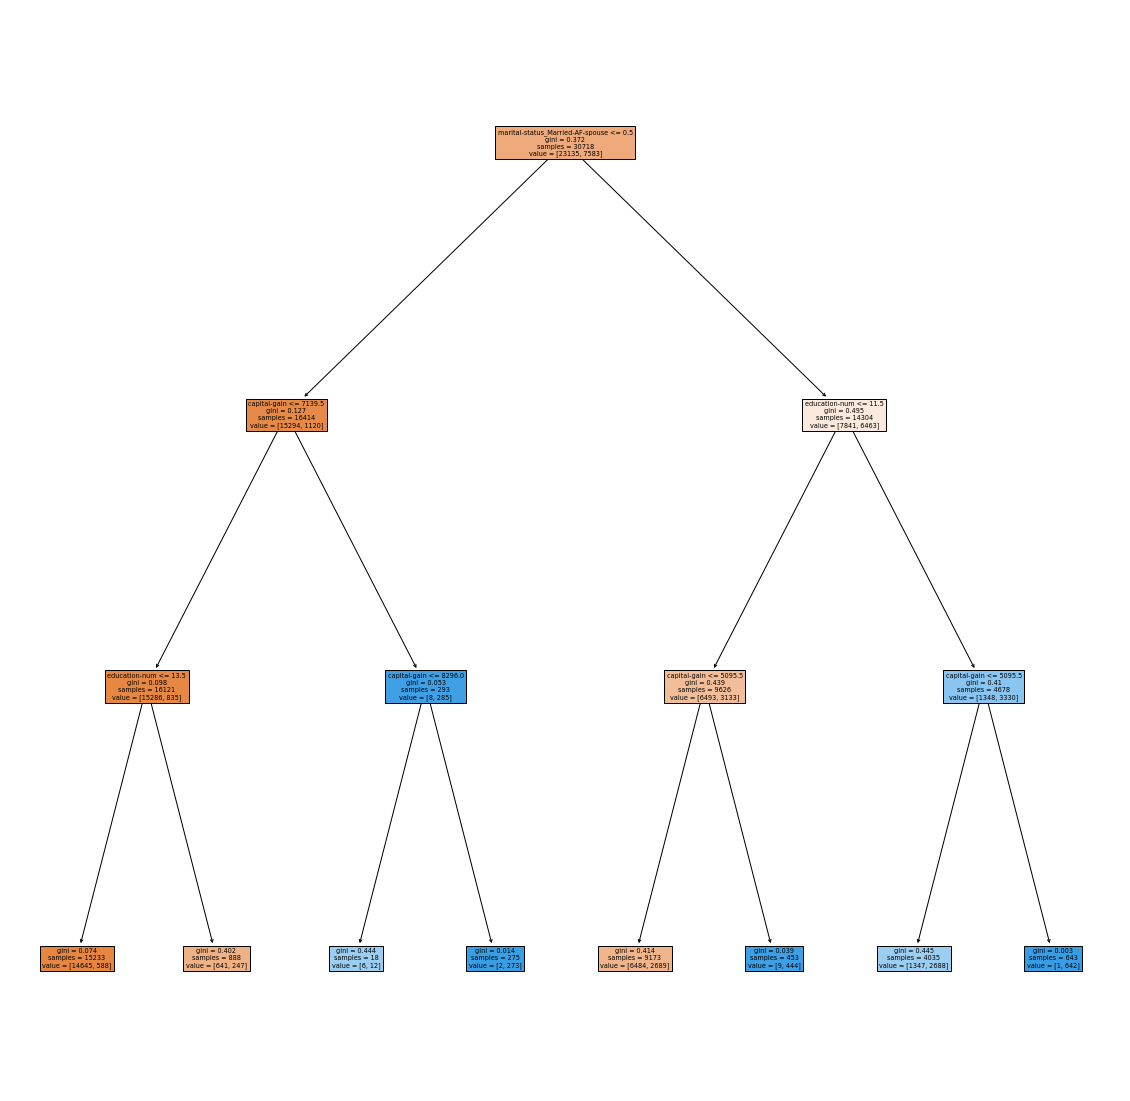

In [56]:
plt.figure(figsize=(20, 20))
_ = plot_tree(model, feature_names=df.columns[:-1], filled=True)

In [57]:
y_pred = model.predict(X_test)

In [59]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [60]:
cm = confusion_matrix(y_test, y_pred)

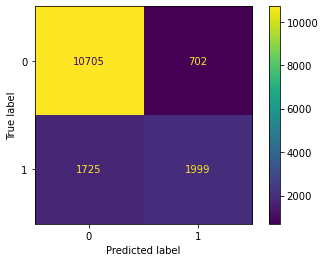

In [61]:
ConfusionMatrixDisplay(cm).plot()

In [62]:
accuracy_score(y_test,y_pred)

0.8396008195096161

In [63]:
pd.DataFrame({"feature":X_train.columns, "importance": model.feature_importances_}).sort_values("importance", ascending = False)

,feature,importance
30,marital-status_Married-civ-spouse,0.522234
4,education-num,0.240577
2,capital-gain,0.237189
0,hours-per-week,0.000000
66,native-country_India,0.000000
...,...,...
33,marital-status_Separated,0.000000
32,marital-status_Never-married,0.000000
31,marital-status_Married-spouse-absent,0.000000
29,marital-status_Married-AF-spouse,0.000000


## Random Forest

The use of a random forest classifier is just as simple with sklearn, the only thing that has to be change is the initialization of the model.

In [64]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [65]:
y_pred = rfc.predict(X_test)

In [66]:
cm = confusion_matrix(y_test, y_pred)

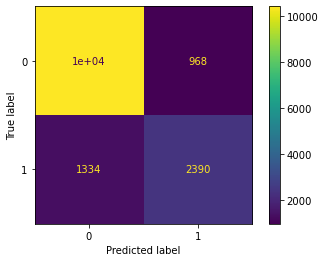

In [67]:
ConfusionMatrixDisplay(cm).plot()

In [68]:
accuracy_score(y_test, y_pred)

0.8478620051549799

In [69]:
df = pd.DataFrame({"feature":X_train.columns, "importance": rfc.feature_importances_}).sort_values("importance", ascending = False)

In [71]:
df.head(20)

,feature,importance
1,age,0.232838
0,hours-per-week,0.114514
2,capital-gain,0.102728
30,marital-status_Married-civ-spouse,0.072319
4,education-num,0.065428
35,relationship_Husband,0.036716
3,capital-loss,0.035020
32,marital-status_Never-married,0.027388
92,occupation_Exec-managerial,0.019082
98,occupation_Prof-specialty,0.016129


In [79]:
df["importance"]

1     0.232838
0     0.114514
2     0.102728
30    0.072319
4     0.065428
        ...   
25    0.000042
75    0.000013
90    0.000012
63    0.000006
62    0.000003
Name: importance, Length: 103, dtype: float64

<AxesSubplot:xlabel='feature', ylabel='importance'>

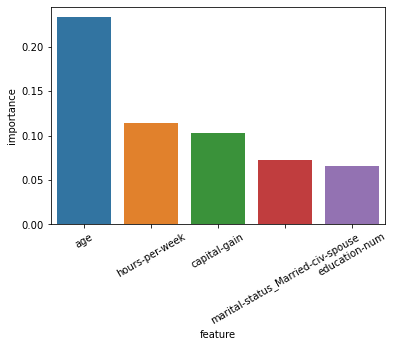

In [88]:
plt.xticks(rotation=30)
sns.barplot(x = df.iloc[:5]["feature"], y = df.iloc[:5]["importance"])

Here we have multiple tree grouped into a forest object, but the individual trees can still be accessed.

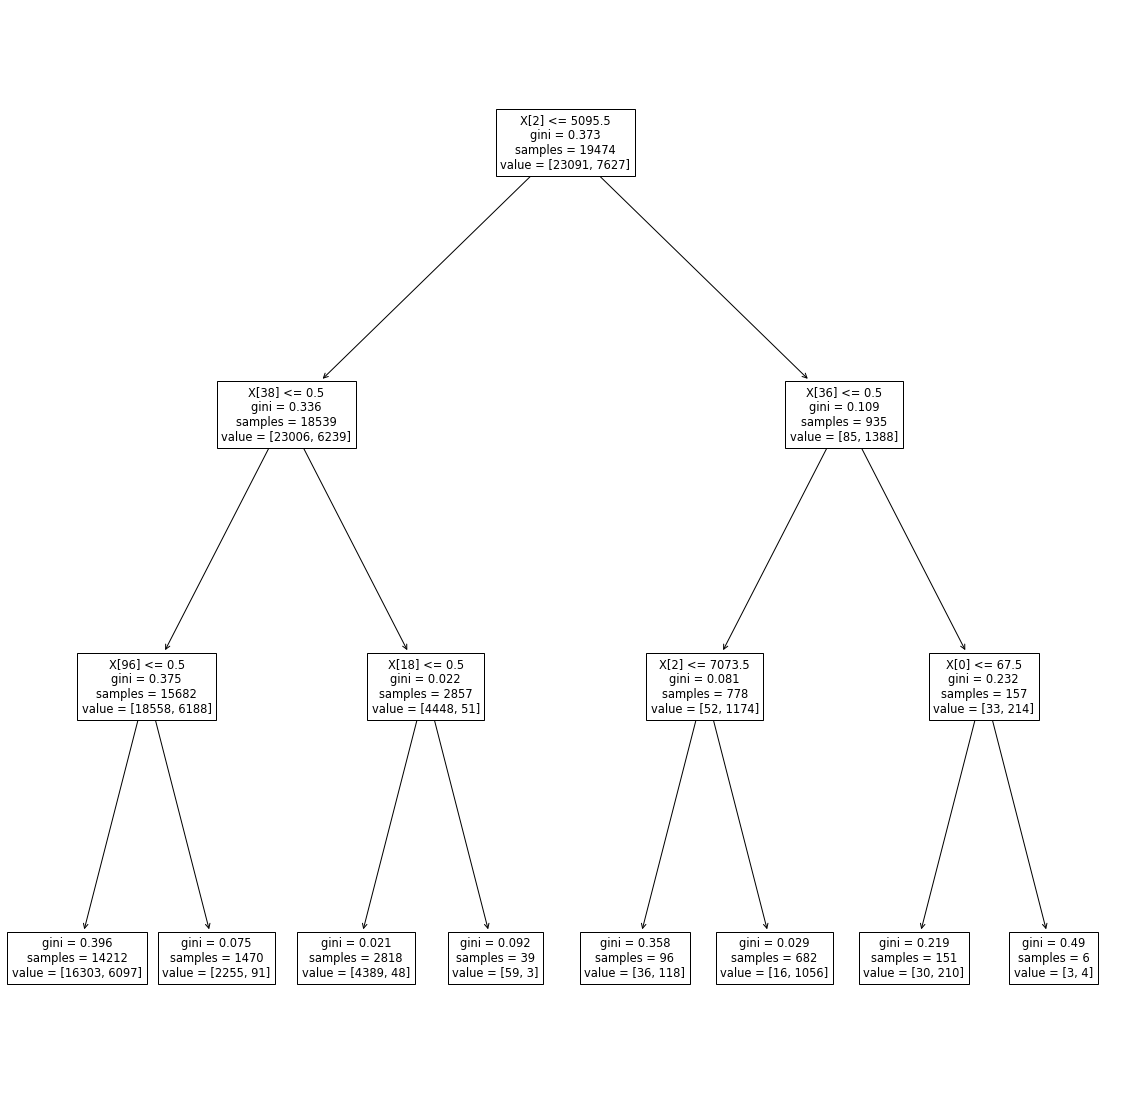

In [72]:
# we redefine the classifier with the max depth of 3 in order to make the plotting of the first tree sensible
rfc_md3 = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)
rfc_md3.fit(X_train, y_train)
single_tree = rfc_md3.estimators_[0]
plt.figure(figsize=(20, 20))
_ = plot_tree(single_tree)

# Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
?LogisticRegression

Init signature:
LogisticRegression(
    penalty='l2',
    *,
    dual=False,
    tol=0.0001,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=None,
    solver='lbfgs',
    max_iter=100,
    multi_class='auto',
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None,
)
Docstring:     
Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
scheme if the 'multi_class' option is set to 'ovr', and uses the
cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
(Currently the 'multinomial' option is supported only by the 'lbfgs',
'sag', 'saga' and 'newton-cg' solvers.)

This class implements regularized logistic regression using the
'liblinear' library, 'newton-cg', 'sag', 'saga' and 'lbfgs' solvers. **Note
that regularization is applied by default**. It can handle both dense
and sparse input. Use C-ordered arrays or CSR matrices containi

In [75]:
lg = LogisticRegression()


In [76]:
lg.fit(X_train, y_train)

/Users/rianne/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler = StandardScaler()

In [79]:
scaler.fit(X_train)

StandardScaler()

In [80]:
lg.fit(scaler.transform(X_train),y_train)

LogisticRegression()

In [81]:
scaler.fit(X_test)

StandardScaler()

In [82]:
y_pred = lg.predict(scaler.transform(X_test))

In [83]:
cm = confusion_matrix(y_test, y_pred)

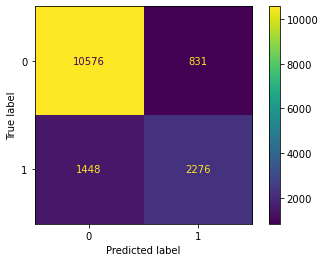

In [84]:
ConfusionMatrixDisplay(cm).plot()

In [85]:
accuracy_score(y_test, y_pred)

0.8493820633137268

## K-means

In dit voorbeeld gaan we op zoek naar logische clusters binnen een keten van ijswinkels. 

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
from sklearn.cluster import KMeans

# We hebben voor acht winkels de verkochte hoeveelheid ijsjes in de smaken chocolade en vanille
X = [[12, 6],
     [15,16],
     [18,17],
     [10, 8],
     [ 8, 7],
     [ 9, 6],
     [12, 9],
     [20,18]]


In [89]:
# doe de clustering
iceMeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [91]:
# Dit zijn de clustermiddelpunten
print(iceMeans.cluster_centers_)

[[10.2         7.2       ]
 [17.66666667 17.        ]]


In [92]:
# deel twee nieuwe winkels in:
print(iceMeans.predict([[11, 15], [20, 4]]))

[1 0]


In [93]:
# In dit dataframe gaan we de initiële gegevens opslaan en later ook de gevonden clusters toevoegen
ijsdf = pd.DataFrame(X)
ijsdf.columns = ['Chocolate', 'Vanille']
ijsdf

,Chocolate,Vanille
0,12,6
1,15,16
2,18,17
3,10,8
4,8,7
5,9,6
6,12,9
7,20,18


In [94]:
# De gevonden clusters voegen we hier toe 
ijsdf['Label'] = iceMeans.labels_
ijsdf

,Chocolate,Vanille,Label
0,12,6,0
1,15,16,1
2,18,17,1
3,10,8,0
4,8,7,0
5,9,6,0
6,12,9,0
7,20,18,1


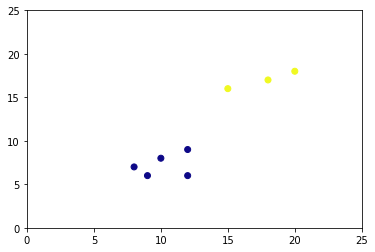

In [95]:
# We gaan de clusters nu visualiseren, dat is handig om te kunnen bepalen wat het verschil is tussen beide clusters
# Je zou misschien verwachten dat er winkels zijn die vooral veel chocolade verkopen en andere die juist veel vanille verkopen
plt.scatter(ijsdf['Chocolate'], ijsdf['Vanille'], c=ijsdf['Label'], cmap='plasma')
plt.xlim(0,25)
plt.ylim(0,25)

plt.show()

Het blijkt dat er drie winkels zijn die meer verkopen dan gemiddeld en vijf winkels die minder verkopen. Er is dus geen chocoladecluster en vanillecluster!